# **Klasifikasi Gambar DogvsCat**

## **Objective:**   
Membangun sebuah model menggunakan CNN yang dapat mengklasifikasikan Anjing dan Kucing.

## **Sumber Dataset**
https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset

# **Import Libraries**

In [1]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from google.colab import files
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Kaggle
!pip install kagglehub
import kagglehub

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Data Loading**

In [2]:
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("✅ Dataset berhasil diunduh.")
print("📂 Path folder dataset:", path)

✅ Dataset berhasil diunduh.
📂 Path folder dataset: /kaggle/input/microsoft-catsvsdogs-dataset


In [3]:
source_path = "/kaggle/input/microsoft-catsvsdogs-dataset"

destination_path = "/content/dogsvscats"

if not os.path.exists(destination_path):
    os.makedirs(destination_path)

for item in os.listdir(source_path):
    s = os.path.join(source_path, item)
    d = os.path.join(destination_path, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        shutil.copy2(s, d)

print(f"✅ Dataset berhasil dipindahkan ke {destination_path}")

✅ Dataset berhasil dipindahkan ke /content/dogsvscats


In [4]:
print("Daftar isi folder dataset:")
for f in os.listdir(destination_path):
    print("-", f)
print("------------------------------")
for f in os.listdir(destination_path + "/PetImages"):
    print("-", f)

Daftar isi folder dataset:
- MSR-LA - 3467.docx
- readme[1].txt
- PetImages
------------------------------
- Cat
- Dog


In [5]:
print("------------------------------")
for f in os.listdir(destination_path + "/PetImages/Cat"):
    print("-", f)

------------------------------
- 894.jpg
- 951.jpg
- 8239.jpg
- 4045.jpg
- 2375.jpg
- 11343.jpg
- 8125.jpg
- 9490.jpg
- 10691.jpg
- 11758.jpg
- 9900.jpg
- 5847.jpg
- 5674.jpg
- 2325.jpg
- 2020.jpg
- 5692.jpg
- 9142.jpg
- 4715.jpg
- 9696.jpg
- 1903.jpg
- 11629.jpg
- 8220.jpg
- 10718.jpg
- 8357.jpg
- 1133.jpg
- 899.jpg
- 9077.jpg
- 2018.jpg
- 4433.jpg
- 6289.jpg
- 11922.jpg
- 9783.jpg
- 2797.jpg
- 11025.jpg
- 3842.jpg
- 9797.jpg
- 1136.jpg
- 877.jpg
- 2645.jpg
- 3999.jpg
- 4107.jpg
- 8692.jpg
- 7979.jpg
- 1159.jpg
- 1698.jpg
- 11310.jpg
- 10887.jpg
- 3114.jpg
- 11362.jpg
- 11582.jpg
- 12146.jpg
- 6226.jpg
- 1745.jpg
- 1501.jpg
- 3271.jpg
- 11240.jpg
- 7220.jpg
- 4394.jpg
- 5360.jpg
- 1502.jpg
- 2402.jpg
- 8408.jpg
- 3578.jpg
- 7466.jpg
- 1451.jpg
- 1350.jpg
- 5845.jpg
- 9087.jpg
- 5415.jpg
- 5227.jpg
- 2696.jpg
- 859.jpg
- 9247.jpg
- 6612.jpg
- 11191.jpg
- 2222.jpg
- 6777.jpg
- 9244.jpg
- 3885.jpg
- 12116.jpg
- 10400.jpg
- 9683.jpg
- 8498.jpg
- 8791.jpg
- 8326.jpg
- 4828.jpg
- 1786.jpg
-

In [6]:
print("------------------------------")
for f in os.listdir(destination_path + "/PetImages/Dog"):
    print("-", f)

------------------------------
- 894.jpg
- 951.jpg
- 8239.jpg
- 4045.jpg
- 2375.jpg
- 11343.jpg
- 8125.jpg
- 9490.jpg
- 10691.jpg
- 11758.jpg
- 9900.jpg
- 5847.jpg
- 5674.jpg
- 2325.jpg
- 2020.jpg
- 5692.jpg
- 9142.jpg
- 4715.jpg
- 9696.jpg
- 1903.jpg
- 11629.jpg
- 8220.jpg
- 10718.jpg
- 8357.jpg
- 1133.jpg
- 899.jpg
- 9077.jpg
- 2018.jpg
- 4433.jpg
- 6289.jpg
- 11922.jpg
- 9783.jpg
- 2797.jpg
- 11025.jpg
- 3842.jpg
- 9797.jpg
- 1136.jpg
- 877.jpg
- 2645.jpg
- 3999.jpg
- 4107.jpg
- 8692.jpg
- 7979.jpg
- 1159.jpg
- 1698.jpg
- 11310.jpg
- 10887.jpg
- 3114.jpg
- 11362.jpg
- 11582.jpg
- 12146.jpg
- 6226.jpg
- 1745.jpg
- 1501.jpg
- 3271.jpg
- 11240.jpg
- 7220.jpg
- 4394.jpg
- 5360.jpg
- 1502.jpg
- 2402.jpg
- 8408.jpg
- 3578.jpg
- 7466.jpg
- 1451.jpg
- 1350.jpg
- 5845.jpg
- 9087.jpg
- 5415.jpg
- 5227.jpg
- 2696.jpg
- 859.jpg
- 9247.jpg
- 6612.jpg
- 11191.jpg
- 2222.jpg
- 6777.jpg
- 9244.jpg
- 3885.jpg
- 12116.jpg
- 10400.jpg
- 9683.jpg
- 8498.jpg
- 8791.jpg
- 8326.jpg
- 4828.jpg
- 1786.jpg
-

## **Gabungkan Data Train dan Data Test ke Direktori yang Sama**

In [7]:
# Path dataset asal
source_dataset = destination_path + "/PetImages"

# Path dataset output
output_base = "/content/dataset_split"

train_ratio = 0.8

# Membuat folder train dan test
train_dir = os.path.join(output_base, "train")
test_dir = os.path.join(output_base, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

class_names = os.listdir(source_dataset)
for class_name in class_names:
    class_dir = os.path.join(source_dataset, class_name)
    if not os.path.isdir(class_dir):
        continue

    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    split_idx = int(len(images) * train_ratio)
    train_images = images[:split_idx]
    test_images = images[split_idx:]

    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    for img in train_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(train_class_dir, img)
        shutil.copy2(src, dst)

    for img in test_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(test_class_dir, img)
        shutil.copy2(src, dst)

print("✅ Dataset berhasil dibagi menjadi train/test.")


✅ Dataset berhasil dibagi menjadi train/test.


## **Plot gambar sampel untuk semua kelas**

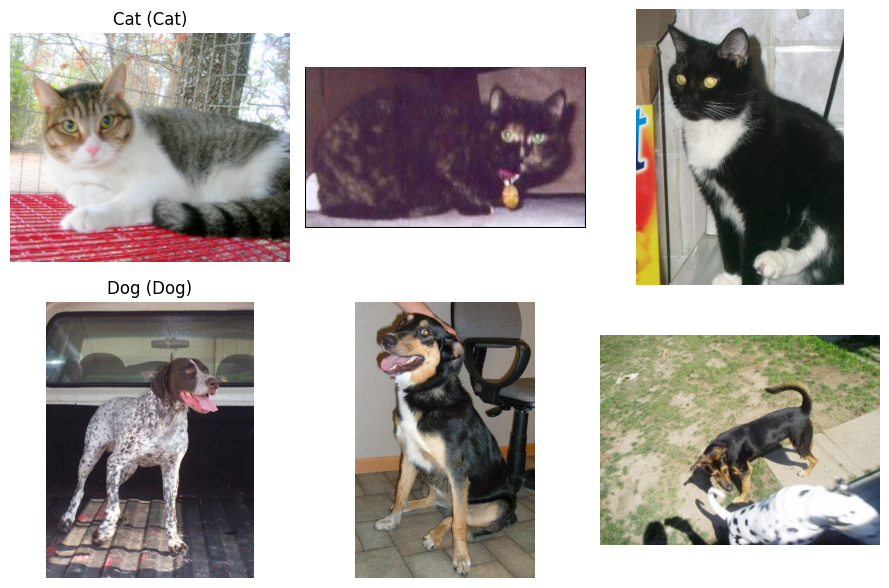

In [8]:
train_dir = "/content/dataset_split/train"

class_codes = sorted(os.listdir(train_dir))

label_mapping = {
    "Cats": "Cat",
    "Dogs": "Dog"
}

n_examples = 3

plt.figure(figsize=(n_examples * 3, len(class_codes) * 3))

for i, code in enumerate(class_codes):
    class_path = os.path.join(train_dir, code)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    sample_images = random.sample(images, min(n_examples, len(images)))

    label_name = label_mapping.get(code, code)

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = imread(img_path)

        plt_idx = i * n_examples + j + 1
        ax = plt.subplot(len(class_codes), n_examples, plt_idx)
        ax.imshow(img)
        ax.axis("off")

        if j == 0:
            ax.set_title(f"{code} ({label_name})")

plt.tight_layout()
plt.show()

## **Plot distribusi gambar di seluruh kelas**

In [9]:
def copy_samples(src_dir, dst_dir, n_samples):
    os.makedirs(dst_dir, exist_ok=True)
    files = [f for f in os.listdir(src_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if len(files) == 0:
        print(f"⚠️ Tidak ada gambar di {src_dir}")
        return
    sampled_files = random.sample(files, min(len(files), n_samples))
    for f in sampled_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(dst_dir, f))

base_src = "/content/dataset_split"
base_dst = "/content/dataset_split_5000"

classes = ['Cat', 'Dog']

for split in ['train', 'test']:
    for cls in classes:
        src_dir = os.path.join(base_src, split, cls)
        dst_dir = os.path.join(base_dst, split, cls)

        if split == 'train':
            n_samples = 5000
        else:
            n_samples = len([f for f in os.listdir(src_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

        print(f"📂 Menyalin {n_samples} gambar dari {src_dir} ke {dst_dir}...")
        copy_samples(src_dir, dst_dir, n_samples)

print("✅ Dataset baru berhasil dibuat di folder:")
print(base_dst)

📂 Menyalin 5000 gambar dari /content/dataset_split/train/Cat ke /content/dataset_split_5000/train/Cat...
📂 Menyalin 5000 gambar dari /content/dataset_split/train/Dog ke /content/dataset_split_5000/train/Dog...
📂 Menyalin 2500 gambar dari /content/dataset_split/test/Cat ke /content/dataset_split_5000/test/Cat...
📂 Menyalin 2500 gambar dari /content/dataset_split/test/Dog ke /content/dataset_split_5000/test/Dog...
✅ Dataset baru berhasil dibuat di folder:
/content/dataset_split_5000


In [10]:
base_dir = "/content/dataset_split_5000"
data = []

for split in ["train", "test"]:
    split_dir = os.path.join(base_dir, split)
    class_names = os.listdir(split_dir)

    for class_name in class_names:
        class_path = os.path.join(split_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        for fname in os.listdir(class_path):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                full_path = os.path.join(class_path, fname)
                data.append({
                    "split": split,
                    "filename": full_path,
                    "label": class_name
                })

df = pd.DataFrame(data)
print(df.head())

   split                                         filename label
0  train    /content/dataset_split_5000/train/Cat/894.jpg   Cat
1  train    /content/dataset_split_5000/train/Cat/951.jpg   Cat
2  train   /content/dataset_split_5000/train/Cat/8239.jpg   Cat
3  train  /content/dataset_split_5000/train/Cat/11343.jpg   Cat
4  train   /content/dataset_split_5000/train/Cat/9142.jpg   Cat


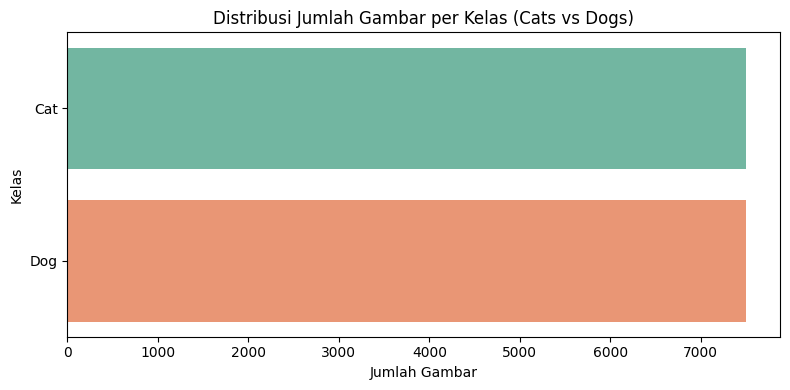

In [11]:
label_mapping = {
    "Cat": "Cat",
    "Dog": "Dog"
}

df["label_full"] = df["label"].map(label_mapping)

df["label_full"] = df["label"].map(label_mapping)

count_per_label = df["label_full"].value_counts().sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(
    x=count_per_label.values,
    y=count_per_label.index,
    palette="Set2"
)

plt.xlabel("Jumlah Gambar")
plt.ylabel("Kelas")
plt.title("Distribusi Jumlah Gambar per Kelas (Cats vs Dogs)")
plt.tight_layout()
plt.show()


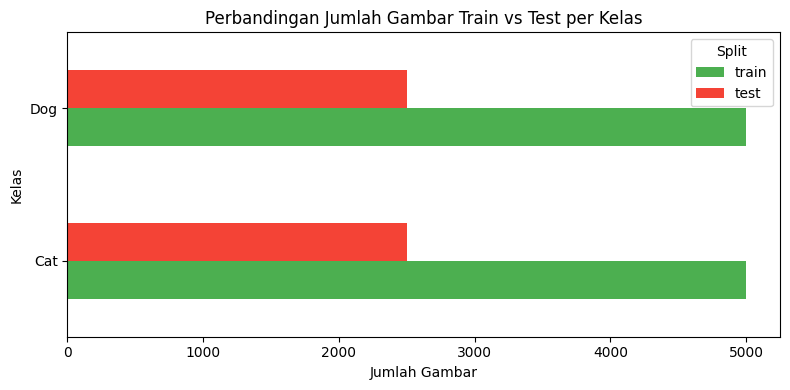

In [12]:
pivot_counts = df.pivot_table(
    index="label_full",
    columns="split",
    aggfunc="size",
    fill_value=0
).reset_index()

ax = pivot_counts.set_index("label_full")[["train", "test"]].plot(
    kind="barh",
    figsize=(8, 4),
    color=["#4caf50", "#f44336"]
)

plt.xlabel("Jumlah Gambar")
plt.ylabel("Kelas")
plt.title("Perbandingan Jumlah Gambar Train vs Test per Kelas")
plt.legend(title="Split")
plt.tight_layout()
plt.show()


# **Data Augmentation**

Proses augmentasi gambar adalah teknik yang digunakan untuk membuat variasi baru dari setiap gambar dalam dataset, sehingga model memiliki lebih banyak variasi untuk dipelajari. Ini membantu mencegah overfitting, di mana model terlalu terbiasa dengan data pelatihan dan tidak dapat menggeneralisasi dengan baik ke data baru.

Berikut adalah beberapa strategi augmentasi gambar yang dapat kita terapkan:

- `anticlockwise_rotation` adalah ketika gambar diputar ke arah berlawanan dengan arah jarum jam.
- `clockwise_rotation` adalah ketika gambar diputar ke arah searah dengan arah jarum jam.
- `flip_up_down` adalah ketika gambar dibalik secara vertikal dari atas ke bawah.
- `sheared` adalah ketika gambar diberikan efek pergeseran acak.
- `blur` adalah ketika gambar diberikan efek kabur atau blur.
- `wrap_shift` adalah ketika gambar diberikan efek pergeseran melengkung.
- `brightness` adalah ketika gambar diberikan efek peningkatan kecerahan.

In [13]:
def random_rotation(img):
    img = tf.image.resize(img, (224, 224))
    k = random.randint(1, 3)
    img = tf.image.rot90(img, k=k)
    return img

def flip_up_down(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.flip_up_down(img)
    return img

def flip_left_right(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.flip_left_right(img)
    return img

def add_brightness(img):
    img = tf.image.resize(img, (224, 224))
    delta = random.uniform(0.1, 0.5)
    img = tf.image.adjust_brightness(img, delta)
    return img

def shear_image(img):
    datagen = ImageDataGenerator(shear_range=0.2)
    img = tf.image.resize(img, (224, 224))
    img = img.numpy()  # ubah ke numpy
    img = np.expand_dims(img, 0)
    img_aug = next(datagen.flow(img, batch_size=1))[0]
    return img_aug

def warp_shift(img):
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
    img = tf.image.resize(img, (224, 224))
    img = img.numpy()
    img = np.expand_dims(img, 0)
    img_aug = next(datagen.flow(img, batch_size=1))[0]
    return img_aug

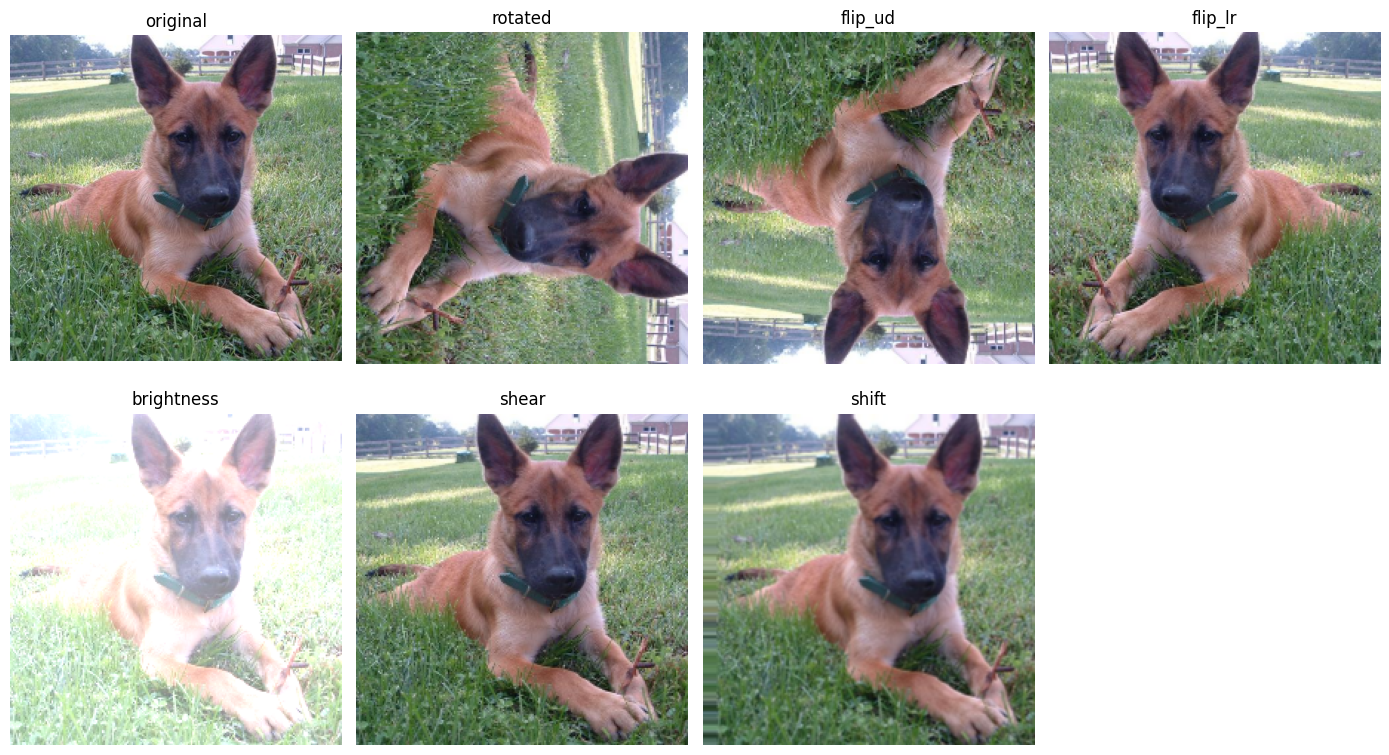

In [14]:
sample = df.sample(1).iloc[0]
img_path = sample["filename"]
img = image.load_img(img_path)
img_array = image.img_to_array(img) / 255.0
img_tensor = tf.convert_to_tensor(img_array)

augmented_images = {
    "original": img_tensor.numpy(),
    "rotated": random_rotation(img_tensor).numpy(),
    "flip_ud": flip_up_down(img_tensor).numpy(),
    "flip_lr": flip_left_right(img_tensor).numpy(),
    "brightness": add_brightness(img_tensor).numpy(),
    "shear": shear_image(img_tensor),
    "shift": warp_shift(img_tensor)
}

plt.figure(figsize=(14, 8))
for i, (key, aug_img) in enumerate(augmented_images.items()):
    ax = plt.subplot(2, 4, i + 1)
    ax.imshow(aug_img)
    ax.set_title(key)
    ax.axis("off")
plt.tight_layout()
plt.show()


In [15]:
output_dir = "/content/dataset_augmentasi"
os.makedirs(output_dir, exist_ok=True)

error_files = []

for i, row in df[df["split"] == "train"].iterrows():
    img_path = row["filename"]
    label_code = row["label"]

    label_folder = os.path.join(output_dir, label_code)
    os.makedirs(label_folder, exist_ok=True)

    try:
        img = image.load_img(img_path, target_size=(224,224))
        img_array = image.img_to_array(img) / 255.0
        img_tensor = tf.convert_to_tensor(img_array)

        aug_images = {
            "original": img_tensor.numpy(),
            "rotated": random_rotation(img_tensor).numpy(),
            "flip_lr": flip_left_right(img_tensor).numpy(),
            "flip_ud": flip_up_down(img_tensor).numpy(),
            "brightness": add_brightness(img_tensor).numpy(),
            "shift": warp_shift(img_tensor)
        }

        base_fname = os.path.splitext(os.path.basename(img_path))[0]
        for aug_name, aug_img in aug_images.items():
            out_path = os.path.join(label_folder, f"{base_fname}_{aug_name}.jpg")
            image.array_to_img(aug_img).save(out_path)

    except Exception as e:
        print(f"⚠️ Gagal memproses file: {img_path}")
        print(f"   Error: {e}")
        error_files.append(img_path)

print("✅ Semua augmentasi selesai.")
print(f"Jumlah file gagal diproses: {len(error_files)}")

⚠️ Gagal memproses file: /content/dataset_split_5000/train/Dog/11702.jpg
   Error: cannot identify image file <_io.BytesIO object at 0x79e6c3693290>
✅ Semua augmentasi selesai.
Jumlah file gagal diproses: 1


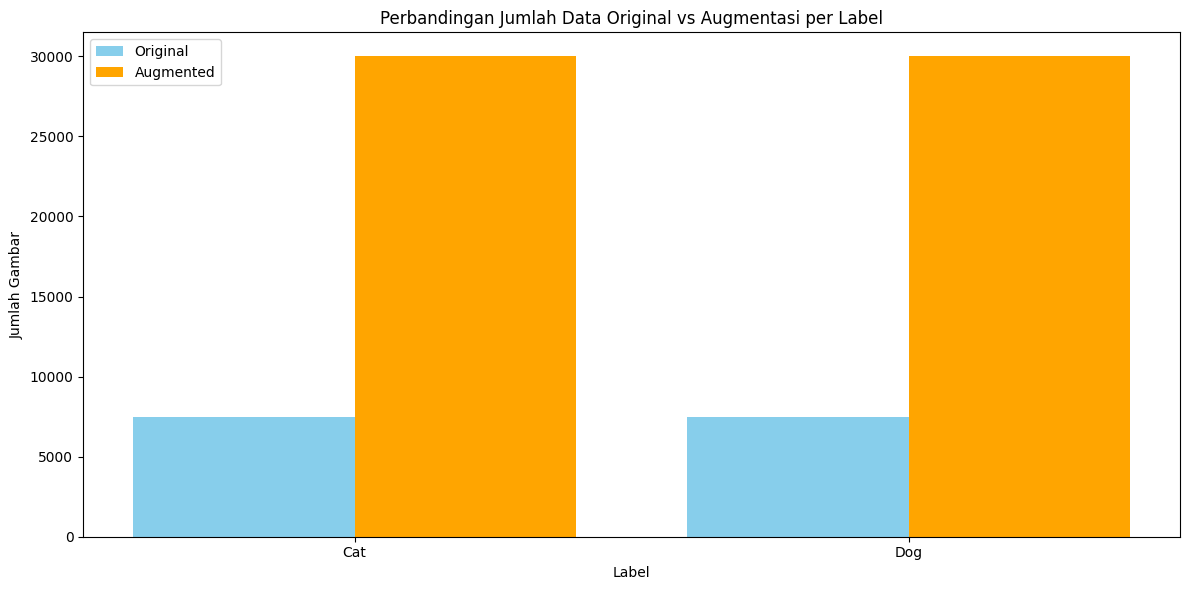

In [16]:
original_counts = df["label"].value_counts().sort_index()

augment_counts = {}

augment_dir = "/content/dataset_augmentasi"
for label in sorted(os.listdir(augment_dir)):
    label_path = os.path.join(augment_dir, label)
    if os.path.isdir(label_path):
        count = len([
            f for f in os.listdir(label_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        augment_counts[label] = count

augment_counts = pd.Series(augment_counts).sort_index()

compare_df = pd.DataFrame({
    "Original": original_counts,
    "Augmented": augment_counts
}).fillna(0).astype(int)

compare_df.reset_index(inplace=True)
compare_df.rename(columns={"index": "Label"}, inplace=True)

plt.figure(figsize=(12,6))
barwidth = 0.4
r1 = range(len(compare_df))
r2 = [x + barwidth for x in r1]

plt.bar(r1, compare_df["Original"], color="skyblue", width=barwidth, label="Original")
plt.bar(r2, compare_df["Augmented"], color="orange", width=barwidth, label="Augmented")

plt.xlabel("Label")
plt.ylabel("Jumlah Gambar")
plt.title("Perbandingan Jumlah Data Original vs Augmentasi per Label")
plt.xticks([r + barwidth/2 for r in range(len(compare_df))], compare_df["Label"])
plt.legend()
plt.tight_layout()
plt.show()

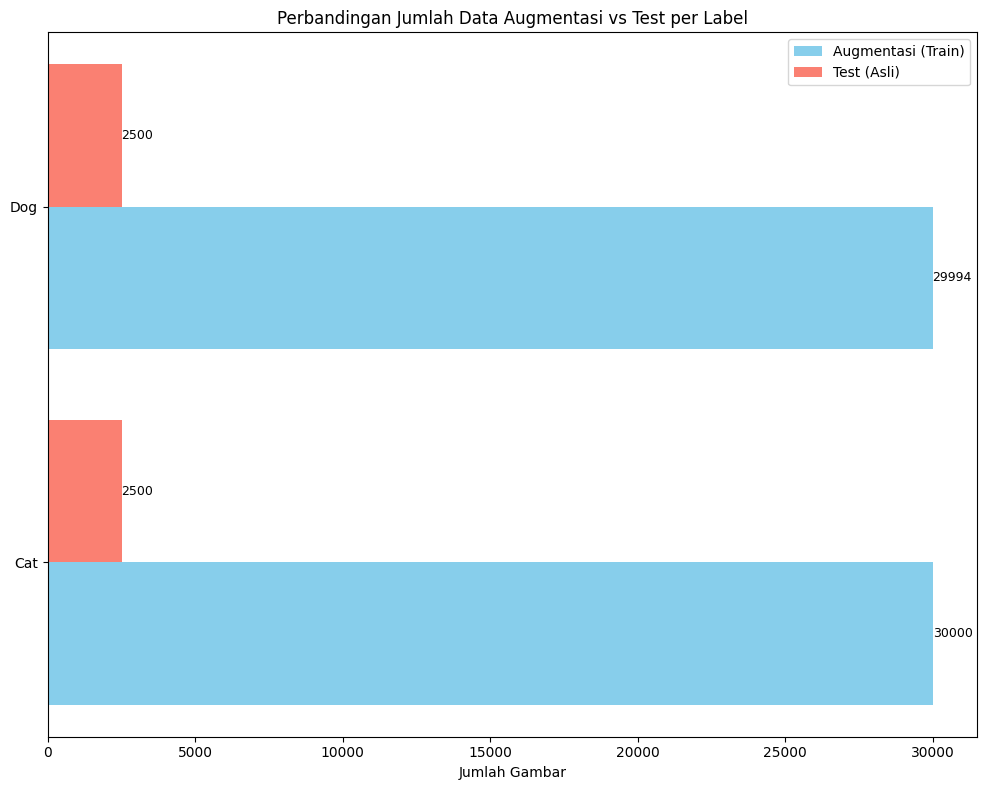

In [17]:
augment_dir = "/content/dataset_augmentasi"
test_dir = "/content/dataset_split/test"

def count_images_per_label(folder):
    counts = {}
    for label in os.listdir(folder):
        label_dir = os.path.join(folder, label)
        if not os.path.isdir(label_dir):
            continue
        count = len([
            f for f in os.listdir(label_dir)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        counts[label] = count
    return counts

augment_counts = count_images_per_label(augment_dir)
test_counts = count_images_per_label(test_dir)

df_aug = pd.DataFrame({
    "label": list(augment_counts.keys()),
    "augment_count": list(augment_counts.values())
})
df_test = pd.DataFrame({
    "label": list(test_counts.keys()),
    "test_count": list(test_counts.values())
})

df_merged = pd.merge(df_aug, df_test, on="label", how="outer").fillna(0)
df_merged = df_merged.sort_values(by="augment_count", ascending=False)

plt.figure(figsize=(10, 8))
bar_height = 0.4
y = range(len(df_merged))

plt.barh(y, df_merged["augment_count"], height=bar_height, label="Augmentasi (Train)", color="skyblue")
plt.barh([i + bar_height for i in y], df_merged["test_count"], height=bar_height, label="Test (Asli)", color="salmon")

plt.yticks([i + bar_height/2 for i in y], df_merged["label"])

for i, (aug, test) in enumerate(zip(df_merged["augment_count"], df_merged["test_count"])):
    plt.text(aug + 1, i, f"{int(aug)}", va="center", fontsize=9, color="black")
    plt.text(test + 1, i + bar_height, f"{int(test)}", va="center", fontsize=9, color="black")

plt.xlabel("Jumlah Gambar")
plt.title("Perbandingan Jumlah Data Augmentasi vs Test per Label")
plt.legend()
plt.tight_layout()
plt.show()


# **Image Data Generator**

In TensorFlow you can do this through the `tf.keras.preprocessing.image.ImageDataGenerator` class. This class allows you to do:
- Configure the random transformation and normalization operations to be performed on the image data during training
- Instantiate generator of augmented image sets (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. This generator can then be used with `tf.keras` model methods which accept generator data as input, `fit`, `evaluate` and `predict`

Prepare the training and validation data, to begin with using `.flow_from_directory()` which generates image datasets and their labels directly in their respective folders by setting the `WIDTH` and `HEIGHT` size, predefined `BATCH SIZE` size and mode its class. Here we use `"binary"` class mode because the number of classes used is 2.

In [18]:
TRAIN_DIR = "/content/dataset_augmentasi"
TEST_DIR = "/content/dataset_split/test"

train_labels = sorted([d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))])
test_labels = sorted([d for d in os.listdir(TEST_DIR) if os.path.isdir(os.path.join(TEST_DIR, d))])

print("=== Jumlah gambar di TRAIN set ===")
for label in train_labels:
    folder = os.path.join(TRAIN_DIR, label)
    count = len([
        f for f in os.listdir(folder)
        if f.lower().endswith(('.jpg','.jpeg','.png'))
    ])
    print(f"{label}: {count} gambar")

print("\n=== Jumlah gambar di TEST set ===")
for label in test_labels:
    folder = os.path.join(TEST_DIR, label)
    count = len([
        f for f in os.listdir(folder)
        if f.lower().endswith(('.jpg','.jpeg','.png'))
    ])
    print(f"{label}: {count} gambar")


=== Jumlah gambar di TRAIN set ===
Cat: 30000 gambar
Dog: 29994 gambar

=== Jumlah gambar di TEST set ===
Cat: 2500 gambar
Dog: 2500 gambar


In [19]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=1,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=False
)

Found 47996 images belonging to 2 classes.
Found 11998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [20]:
print(train_generator.class_indices)
print(train_generator.samples, "training samples")
print(validation_generator.samples, "validation samples")
print(test_generator.samples, "test samples")


{'Cat': 0, 'Dog': 1}
47996 training samples
11998 validation samples
5000 test samples


# **Model:**

In [22]:
num_classes = len(train_generator.class_indices)

model = Sequential([
    InputLayer(input_shape=(224, 224, 3)),

    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Feature extraction
    GlobalAveragePooling2D(),

    # Classifier
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

class StopAtAccuracy(Callback):
    def __init__(self, target=0.85):
        super(StopAtAccuracy, self).__init__()
        self.target = target

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get('accuracy')
        if acc is not None and acc >= self.target:
            print(f"\n🎉 Training dihentikan karena akurasi mencapai {acc:.2%}")
            self.model.stop_training = True

early_stop = EarlyStopping(
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    factor=0.2,
    patience=5,
    verbose=1
)

stop_85 = StopAtAccuracy(target=0.85)

callbacks = [early_stop, reduce_lr, stop_85]

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=callbacks
)

# Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc:.2%}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,778 (811.63 KB)

 Trainable params: 207,138 (809.13 KB)

 Non-trainable params: 640 (2.50 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 915s 597ms/step - accuracy: 0.6124 - loss: 0.6558 - val_accuracy: 0.6734 - val_loss: 0.6068 - learning_rate: 0.0010
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 876s 584ms/step - accuracy: 0.7012 - loss: 0.5704 - val_accuracy: 0.7247 - val_loss: 0.5501 - learning_rate: 0.0010
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 926s 618ms/step - accuracy: 0.7649 - loss: 0.4917 - val_accuracy: 0.7674 - val_loss: 0.4832 - learning_rate: 0.0010
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 933s 622ms/step - accuracy: 0.8111 - loss: 0.4184 - val_accuracy: 0.5702 - val_loss: 1.4265 - learning_rate: 0.0010
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.8474 - loss: 0.3431
🎉 Training dihentikan karena akurasi mencapai 85.26%
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 939s 626ms/step - accuracy: 0.8474 - loss: 0.3431 - val_accuracy: 0.8286 - val_loss: 0.3796 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
4808/5000 ━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.8644 - loss: 0.3268

✅ Test Accuracy: 87.32%


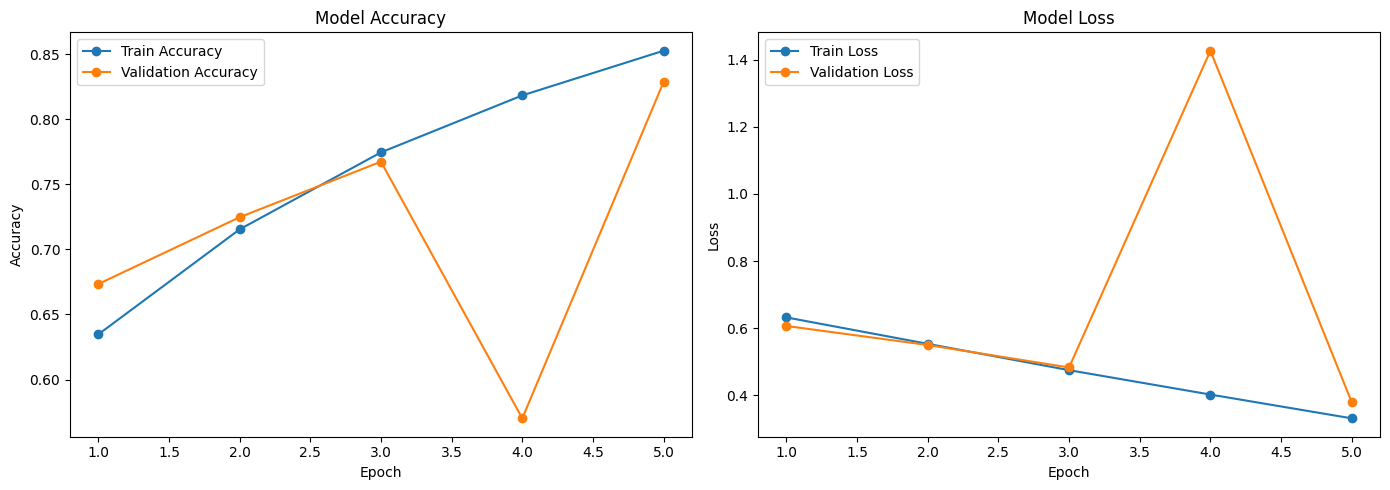

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_acc, label="Validation Accuracy", marker="o")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")

plt.tight_layout()
plt.show()

In [37]:
model.export('saved_model/my_model')

print("✅ Model disimpan dalam format SavedModel")

!zip -r my_model_saved.zip saved_model/my_model

iles.download('my_model_saved.zip')

Saved artifact at 'saved_model/my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  134029862716432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029862730640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860372752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860374096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860372944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860373520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860374480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860375824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860375248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860376400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
model.save('my_model.h5')
print("✅ Model berhasil disimpan sebagai 'my_model.h5'")

# Cek apakah file model ada
if os.path.exists('my_model.h5'):
    # Load model dari file .h5
    model = tf.keras.models.load_model('my_model.h5')

    # Konversi ke TensorFlow Lite
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    # Simpan model TFLite
    with open('model.tflite', 'wb') as f:
        f.write(tflite_model)

    print("✅ Model TFLite sudah dibuat")
else:
    print("❌ File 'my_model.h5' tidak ditemukan. Pastikan file berada di direktori yang benar.")


✅ Model berhasil disimpan sebagai 'my_model.h5'


Saved artifact at '/tmp/tmp34zgpb5n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  134029862716432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029862730640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860372752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860374096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860372944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860373520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860374480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860375824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860375248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134029860376400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1340298603750

In [38]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    saved_model/my_model \
    tfjs_model/

!zip -r tfjs_model.zip tfjs_model

files.download('tfjs_model.zip')


2025-07-06 02:08:54.143343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751767734.216999   29554 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751767734.235177   29554 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-07-06 02:09:01.178418: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1751767741.178602   29554 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving images.jpg to images (2).jpg


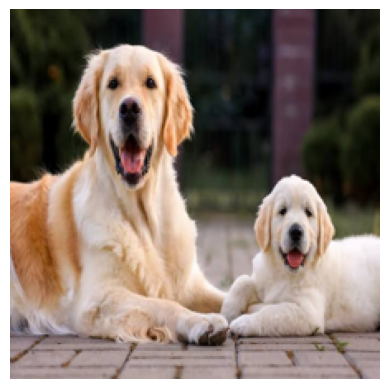

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
✅ Gambar: images (2).jpg
✅ Prediksi: Dog (Confidence: 99.26%)


In [44]:
model = tf.keras.models.load_model('my_model.h5')

class_names = ['Cat', 'Dog']

uploaded = files.upload()

for file_name in uploaded.keys():
    img = Image.open(file_name).convert('RGB')
    img = img.resize((224, 224))

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  #

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    print(f"✅ Gambar: {file_name}")
    print(f"✅ Prediksi: {predicted_class} (Confidence: {confidence:.2%})")